In [13]:
import numpy as np
import matplotlib.pyplot as plt

Data Model: data = signal+noise    
signal           = Ax+mu  
x is a random number drawn from a standard normal distribution, < x >=0, <x^2>=1    
the noise is Gaussian with mean =< noise >=0 and variance = < ( x-< x >)**2 >=sigma^2

A and mu depend on the parameters a,b. a and b are the parameters we are interested in inferring.

In [ ]:
#get A as a function of a,b
def get_A(a,b,dim=1):
    A = a**2*np.ones((dim,dim))+b/2.
    return A

In [ ]:
#get mu as a function of a,b
def get_mu(a,b, dim=1):
    mu = a**3/np.exp(b)*np.ones(dim)
    return mu

Fiducial Parameters (this is the underlying truth)

In [ ]:
a_0=2; b_0=0.5

In [ ]:
A_0  = get_A(a_0,b_0)
mu_0 = get_mu(a_0, b_0)

Noise level

In [ ]:
sigma = 0.1

In [16]:
def generate_noise(sigma,dim=1,nsamples=100,rand_seed=None):
    np.random.seed(rand_seed)
    noise = np.random.randn(nsamples,dim)*sigma
    return noise

In [17]:
def generate_signal(A,mu,sigma,dim=1, nsamples=100,rand_seed=None):
    np.random.seed(rand_seed)
    x      = np.random.randn(nsamples,dim)
    signal = A*x+mu
    return signal

In [18]:
def generate_data(A,mu,sigma,dim,nsamples,rand_seed=None):
    
    signal = generate_signal(A,mu,sigma,dim,nsamples,rand_seed)
    noise  = generate_noise(sigma,dim,nsamples,rand_seed)
    
    data   = signal+noise
    
    return data

fiducial data (that's the assumed truth)

In [44]:
fid_data = generate_data(A_0,mu_0,sigma,dim=1, nsamples=1000,rand_seed=None)

In [45]:
def Gaussian(x,Mu,Sigma):
    return 1/np.sqrt(np.pi*2.)/Sigma*np.exp(-0.5*(x-Mu)**2/Sigma**2)

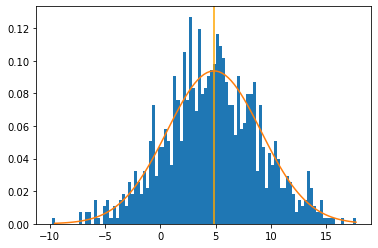

In [58]:
_, bins,_ = plt.hist(fid_data, density=True,bins=100)
plt.axvline(mu_0,color='orange')
delta = np.diff(bins) 
bins  = bins[0:-1]+delta
plt.plot(bins,np.squeeze(Gaussian(bins,mu_0,(A_0**2+sigma**2)**(0.5))))
plt.show()

Finding the maximum of P(A)

In [1]:
def get_Gaussian(mu,Sigma):
    
    def Gaussian(x):
        return 1/np.sqrt((2.*np.pi))/Sigma*np.exp(-0.5*(x-mu)**2/Sigma**2)
    
    return Gaussian

In [187]:
def get_Sigma(params):
    a,b = params
    return 1/(a**3+1)

def get_mu(params):
    a,b = params
    return (b-2)**2

In [188]:
def data_probability(params,data):
    Sigma = get_Sigma(params)
    mu    = get_mu(params)
    prob  = get_Gaussian(mu, Sigma)
    return prob(data)

In [238]:
def finite_diff(params,func):
    delta_params = np.asarray(params)*0.01
    derivative = (func(params+delta_params)-func(params-delta_params))/(2*delta_params)
    return derivative

In [239]:
from functools import partial

In [240]:
def generate_data(params):
    Sigma = get_Sigma(params)
    mu    = get_mu(params)
    data  = Sigma*np.random.randn(1)+mu
    return data

In [241]:
true_params = [1.5,2]

In [242]:
data = generate_data(true_params)
print(data)

[-0.17914293]


In [243]:
p_of_params = partial(data_probability, data=data)
deriv       = partial(finite_diff,func=p_of_params)

In [244]:
from scipy.optimize import fsolve

In [248]:
best_params= fsolve(deriv,[2.,2.])

In [249]:
a_ = np.linspace(-0.9,10,100)
b_ = np.linspace(-0.9,10,100)
a_, b_ = np.meshgrid(a_,b_)
p  = p_of_params([a_,b_])


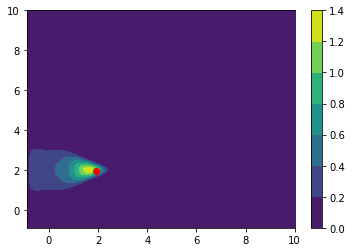

In [250]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(a_, b_, p)
plt.scatter(best_params[0],best_params[1],color='red')
fig.colorbar(cp)